In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("heart failure.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

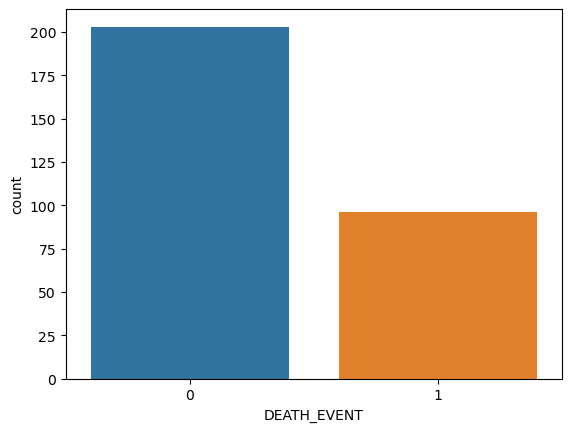

In [8]:
sns.countplot(x='DEATH_EVENT', data=df)

In [9]:
df.high_blood_pressure.value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

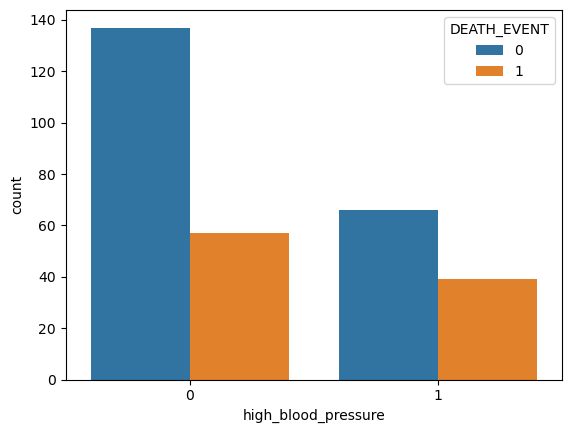

In [10]:
sns.countplot(x = 'high_blood_pressure', data=df, hue='DEATH_EVENT')

<Axes: xlabel='count', ylabel='high_blood_pressure'>

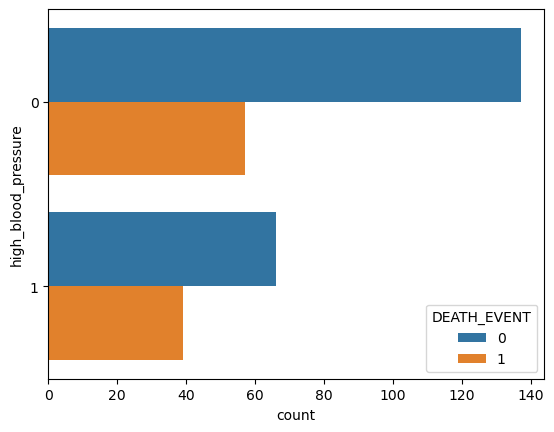

In [11]:
sns.countplot(y = 'high_blood_pressure', data=df, hue='DEATH_EVENT')

<Axes: xlabel='high_blood_pressure', ylabel='count'>

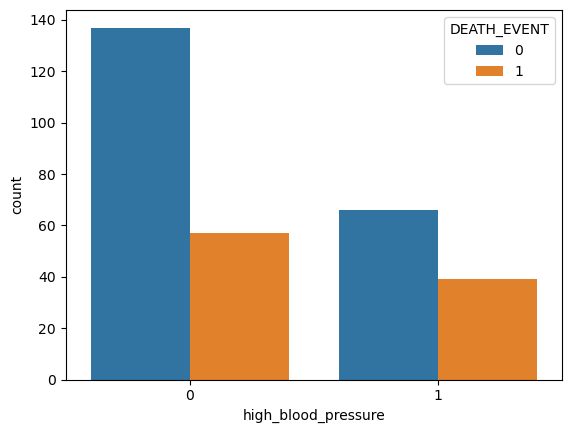

In [12]:
sns.countplot(x = 'high_blood_pressure', data=df, hue='DEATH_EVENT')

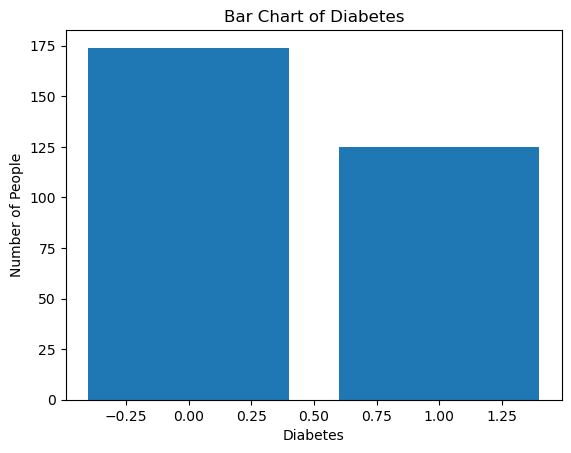

In [13]:
# Create a bar chart of the number of customers for each country origin
plt.bar(df['diabetes'].value_counts().index, df['diabetes'].value_counts().values)
plt.xlabel("Diabetes")
plt.ylabel("Number of People")
plt.title("Bar Chart of Diabetes")
plt.show()

In [16]:
diabetes_Status = df['diabetes'].value_counts()
transactions = diabetes_Status.index
quantity = diabetes_Status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="diabetes Status")
figure.show()

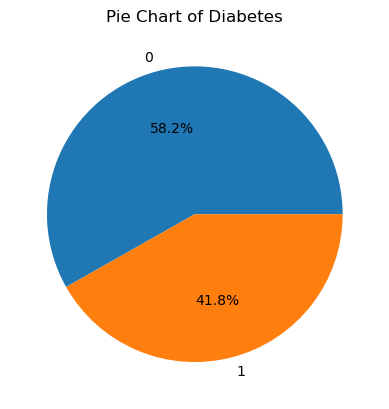

In [17]:
# Get pie chart slice labels
pie_chart_slice_labels = df['diabetes'].value_counts().index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = df['diabetes'].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Diabetes")
plt.show()


In [18]:
df.anaemia.value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

<Axes: xlabel='anaemia', ylabel='count'>

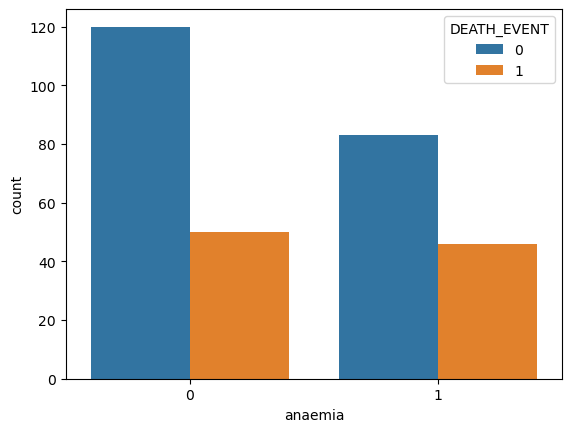

In [19]:
sns.countplot(x='anaemia', data=df, hue = 'DEATH_EVENT')

<Axes: xlabel='sex', ylabel='count'>

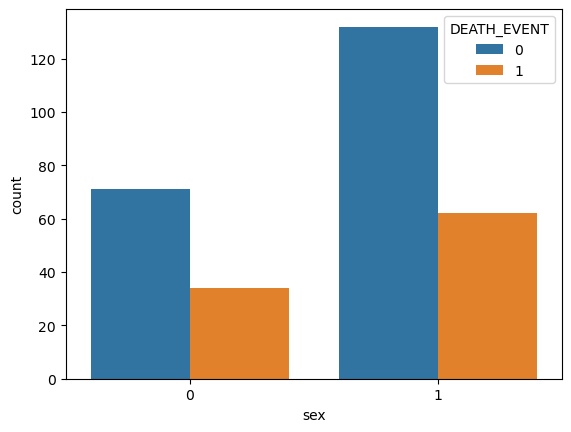

In [20]:
sns.countplot(x='sex', data=df, hue='DEATH_EVENT')

# Train Test Sep

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']], random_state=42, train_size=.70)

In [22]:
xtrain.shape

(209, 12)

In [23]:
xtrain.head(3)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
224  58.0        0                       582         1                 25   
68   70.0        0                       161         0                 25   
222  42.0        1                        86         0                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
224                    0   504000.0               1.0           138    1   
68                     0   244000.0               1.2           142    0   
222                    0   365000.0               1.1           139    1   

     smoking  time  
224        0   205  
68         0    66  
222        1   201

In [24]:
xtest.shape

(90, 12)

In [25]:
ytest.shape

(90, 1)

In [26]:
ytest.head(3)

DEATH_EVENT
281            0
265            0
164            1

In [27]:
xtrain.shape

(209, 12)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [29]:
dt.fit(xtrain, ytrain) #training done

DecisionTreeClassifier()

In [30]:
#let's predict
pred = dt.predict(xtrain) #training result
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
import numpy as np
np.array(ytrain['DEATH_EVENT'])

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
#let's predict for test data
pred = dt.predict(xtest) #test result
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [33]:
import numpy as np
np.array(ytest['DEATH_EVENT']) #original test_y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

Training Score

In [34]:
dt.score(xtrain, ytrain['DEATH_EVENT']) #trainig accuracy

1.0

In [35]:
dt.score(xtest, ytest['DEATH_EVENT']) #testing accuracy

0.6666666666666666

Overfit

# Confusion Matrix

In [36]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [37]:
ytest.head()

DEATH_EVENT
281            0
265            0
164            1
9              1
77             0

In [38]:
xtest.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
281                    0    51000.0               2.7           136    1   
265                    0   362000.0               0.9           140    1   
164                    0   334000.0               1.1           139    1   
9                      1   388000.0               9.4           133    1   
77                     0   237000.0               1.2           140    1   

     smoking  time  
281        1   250  
265        1   240  
164        0   129  
9          1    10  
77         0    74

In [39]:
pred_test_data = dt.predict(xtest) #predicted result
pred_test_data

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [40]:
dt.score(xtest, ytest) #accuracy

0.6666666666666666

In [41]:
accuracy_score(ytest, dt.predict(xtest)) # actual y and predicted y

0.6666666666666666

In [42]:
confusion_matrix(ytest, pred_test_data)

array([[41, 12],
       [18, 19]], dtype=int64)

In [43]:
cm = confusion_matrix(ytest, dt.predict(xtest))
cm

array([[41, 12],
       [18, 19]], dtype=int64)

<Axes: >

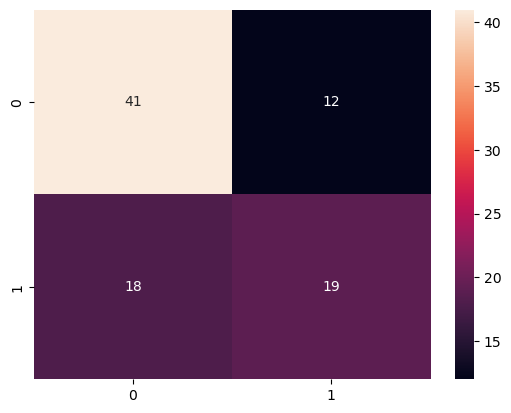

In [44]:
sns.heatmap(cm, annot=True)

In [45]:
# (42+19) / (18+11+42+19) true class/total class

In [46]:
precision_score(ytest, dt.predict(xtest))

0.6129032258064516

In [47]:
recall_score(ytest, dt.predict(xtest))

0.5135135135135135

In [48]:
f1_score(ytest, dt.predict(xtest))

0.5588235294117647

In [49]:
print(classification_report(ytest, dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



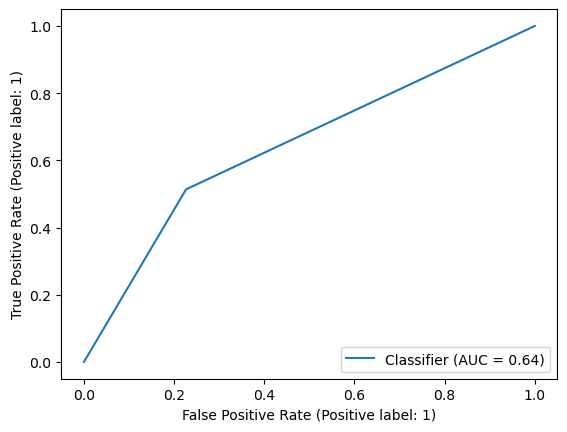

In [50]:
RocCurveDisplay.from_predictions(ytest, dt.predict(xtest))
#plt.plot([0,1],[0,1])
plt.show()

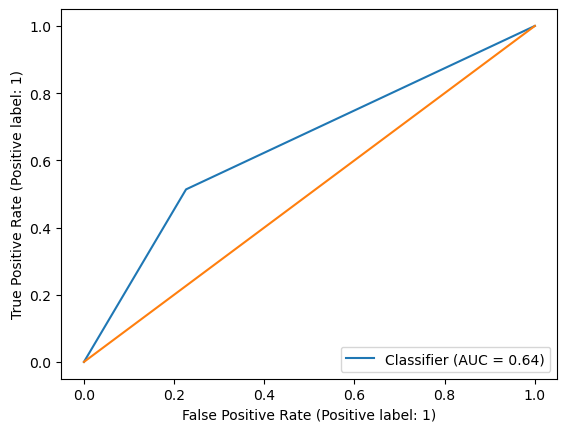

In [51]:
RocCurveDisplay.from_predictions(ytest, dt.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

# Cross Validation

In [52]:
x = df.drop('DEATH_EVENT',axis=1)
y = df[['DEATH_EVENT']]

# K-Fold CV

In [53]:
from sklearn.model_selection import KFold, cross_val_score

In [54]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 20% data

In [55]:
result = cross_val_score(dt, x, y, cv=kfold) 

In [56]:
result

array([0.73333333, 0.8       , 0.83333333, 0.81666667, 0.81355932])

In [57]:
result.mean()

0.7993785310734464

# Stratified KFold

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
st = StratifiedKFold(n_splits=5)

In [60]:
score2 = cross_val_score(dt, x,y, cv=st)

In [61]:
score2

array([0.36666667, 0.88333333, 0.71666667, 0.56666667, 0.6440678 ])

In [62]:
score2.mean()

0.6354802259887006

# Leave One Out

In [63]:
from sklearn.model_selection import LeaveOneOut

In [64]:
le = LeaveOneOut()

In [65]:
result3 = cross_val_score(dt,x,y,cv=le)
result3

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [66]:
result3.mean()

0.7725752508361204